# Estimating Parameters

Pedagogically, the Exponential and Gamma distributions will provide us insight on the difference between the likelihood estimate of population parameters and estimates of the mean of a random variable.

# Exponential Distribution

In [2]:
# HIDDEN
update_geom_defaults("point", list(colour = "blue"))
update_geom_defaults("density", list(colour = "blue"))
update_geom_defaults("path", list(colour = "blue"))
old <- theme_set(theme_bw() + theme(text = element_text(size=18)))

Let $X \sim \text{Exponential}(\beta)$.  Then $X$ has probability density function

$$ \text{exponential}(x | \beta) = \beta\exp{(-\beta x)} $$

for $x \geq 0$ and $\beta > 0$.  The parameter $\beta$ measures the rate at which events occur.  From this, it's easy enough to verify the mean of an exponential random variable is $\mathbb{E}(X) = 1 / \beta$ as derived from

$$ \mathbb{E}(X) = \int_0^{\infty} x \, d\text{ Exponential}(x).$$

Consider a random sample that measures days between rain events at the Winnipeg International Airport (Canada), from the R library DAAG {% cite Maindonald:2015 %}.  These data measure the time between rain events, and are thus necessarily positive as the density plot below shows.  The maximum likelihood estimate of the rate parameter is $\hat{\beta} = N / \sum_{n=1}^N X_N$.  The exponential density function with an estimated rate parameter $\hat{\beta}$ is drawn over the density plot. 

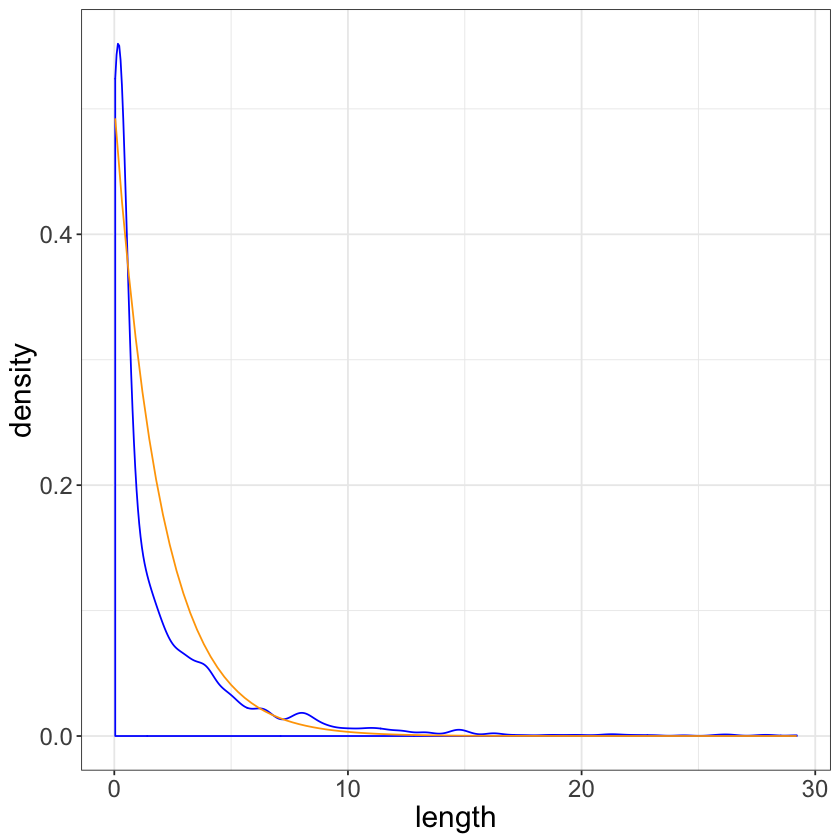

In [10]:
library(ggplot2)
df <- read.csv("https://vincentarelbundock.github.io/Rdatasets/csv/DAAG/droughts.csv")
beta <- 1 / mean(df$length)
ggplot(data=df, aes(length)) +
    geom_density() +
    stat_function(fun=dexp, args=list(rate=beta), color='orange')

# Gamma Distribution

Let $X \sim \text{Gamma}(\alpha, \beta)$.  Then $X$ has probability density function

$$ \text{gamma}(x | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} x^{\alpha - 1} \exp{ (-\beta x) } $$

for $x \geq 0, \alpha > 0$, and $\beta > 0$.  Notice that when $\alpha = 1$, the exponential density function is recovered since the [gamma function](https://en.wikipedia.org/wiki/Gamma_function) evaluated at $1$ is equal to $1$, $\Gamma(1) = 1$.

The Gamma distribution has one parameter more than the exponential distribution.  In general, more parameters in a model will enable better adaption to the data.  Don't read too closely into this though, better adaption to a dataset does not guarantee better predictions.  We'll consider this point more closely later on in the course.

The second parameter $\alpha$ is called the shape parameter.  Because the shape parameter appears inside the gamma function, there is no closed form for the maximum likelihood estimator of $\alpha$.  Instead of maximizing the likelihood function by hand, we'll use a computer to approximate the parameters that maximize the likelihood function of the Gamma density function.

The computer maximized likelihood for the gamma density function applied to the same dataset above gives estimates $\hat{\alpha} = 0.472$ and $\hat{\beta} = 0.24$.  Below, the gamma density function with $(\hat{\alpha}, \hat{\beta})$ overlays the density plot for these data.  We see that the Gamma distribution fits these data better than the Exponential distribution.  This happens because the Gamma distribution has one more parameter than the Exponential distribution.

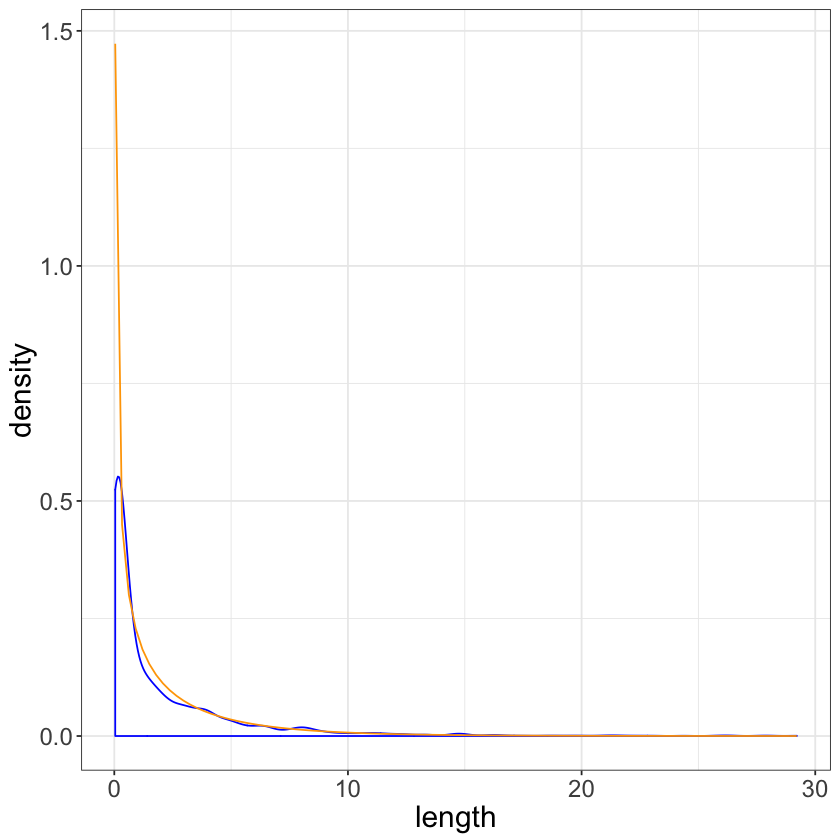

In [11]:
ggplot(data=df, aes(length)) +
    geom_density() +
    stat_function(fun=dgamma, args=list(shape=0.472, rate=.24), color='orange')